In [53]:
from cycler import cycler
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import scipy as sp
import time
import math
import random
import time
import warnings
import sys

sys.setrecursionlimit(20000000)
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
plt.rc('axes', prop_cycle=cycler(color=plt.get_cmap('Paired').colors))

In [54]:
def read (file):
    
    array = [ [] for _ in range(50001)]
    
    for line in file:
        a, b, c = map(int, line.rstrip().split(' '))
        array[a].append([b, c])
    
    for i in range(len(array)):
        array[i] = sorted(array[i], key=lambda x: x[0])
    
    time = [ [j[1] for j in i] for i in array]
    numEdges = [ [j[0] for j in i] for i in array]
    
    return numEdges, time
    

In [55]:
def approximationOfTheFunction(X, Y, name, OX, OY, label="", d =2 ):
        
    fp, residuals, rank, sv, rcond = sp.polyfit(X, Y, d, full=True)
    f = sp.poly1d(fp)
                 
    plt.title(name, fontsize=16)
    plt.axis([OX[0], OX[1], OY[0], OY[1]])
        
    color = random.random(), random.random(), random.random()
    
    plt.plot(X, Y, 'o', label = "Output data " + label, markersize = 5)
    plt.plot(range(OX[0], OX[1]), f(range(OX[0], OX[1])), label=label, linewidth = 2)
    
    plt.legend(loc='upper center', bbox_to_anchor=(1.5, 0.8),  shadow=False, ncol=1, fontsize=16)
    plt.grid(True)    

In [56]:
bellman_ford = read(open("results/time_AlgBellmanFord.txt"))
floyd = read(open("results/time_AlgFloyd.txt"))
johnson = read(open("results/time_AlgJohnson.txt"))
matrix_mult = read(open("results/time_AlgMatrixMultiplication.txt"))
dijkstra = read(open("results/time_AlgDijkstra.txt"))
astar = read(open("results/time_AlgAStar.txt"))

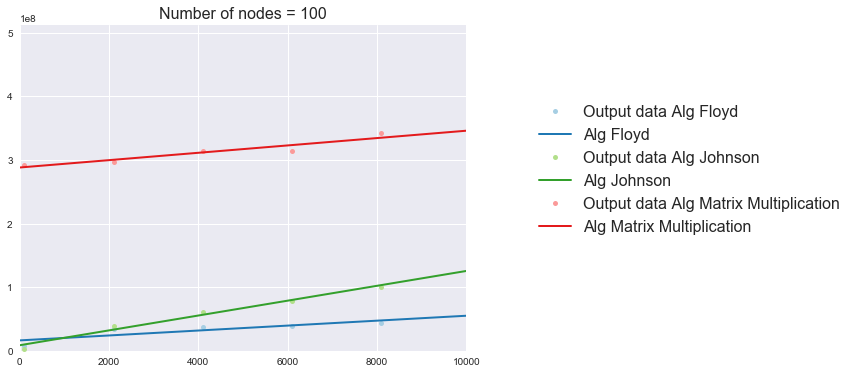

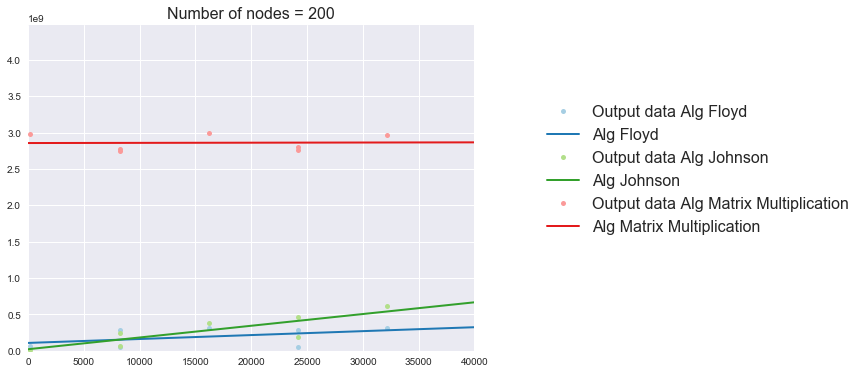

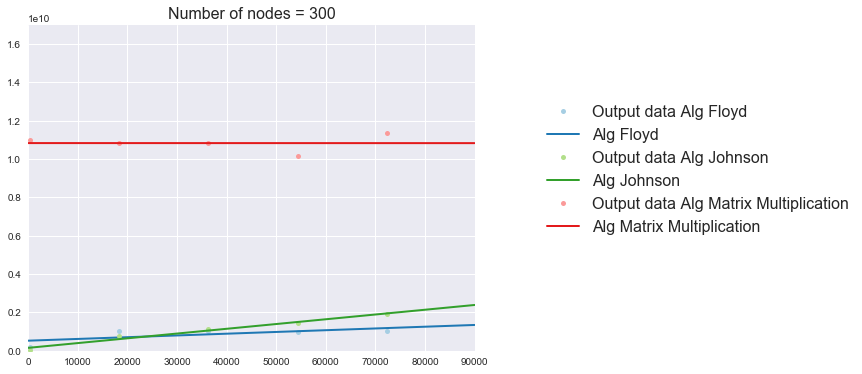

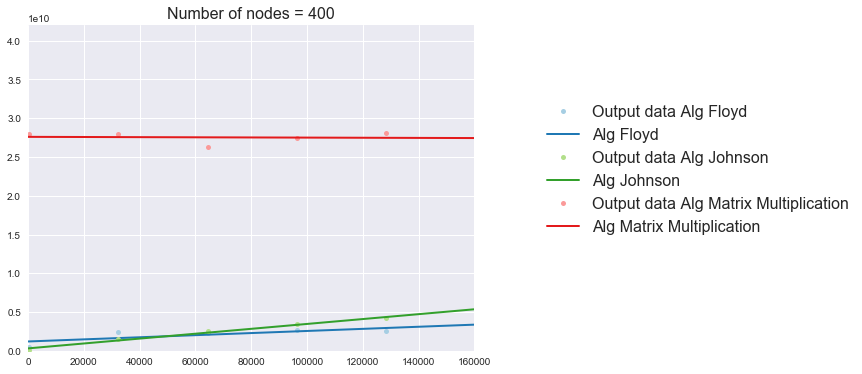

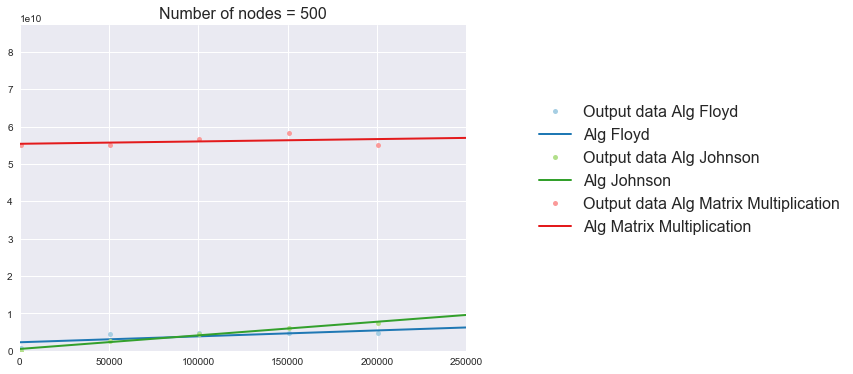

In [57]:
for i in range(50001):
    
    if len(floyd[0][i]) == 0:
        continue
            
    plt.figure(figsize=(8,6))
    
    x_min = 0
    x_max = i * i
    y_min = 0
    y_max = max(matrix_mult[1][i]) * 1.5
    
    approximationOfTheFunction(floyd[0][i], floyd[1][i], "Number of nodes = " + str(i), 
                                            [x_min, x_max], [y_min, y_max], "Alg Floyd", d = 1)
   
    approximationOfTheFunction(johnson[0][i], johnson[1][i], "Number of nodes = " + str(i), 
                                            [x_min, x_max], [y_min, y_max], "Alg Johnson", d = 1)
   
    approximationOfTheFunction(matrix_mult[0][i], matrix_mult[1][i], "Number of nodes = " + str(i), 
                                            [x_min, x_max], [y_min, y_max], "Alg Matrix Multiplication", d = 1)

    plt.show()

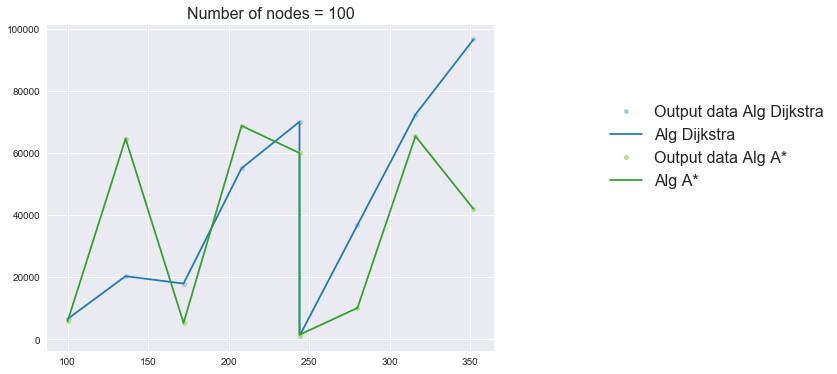

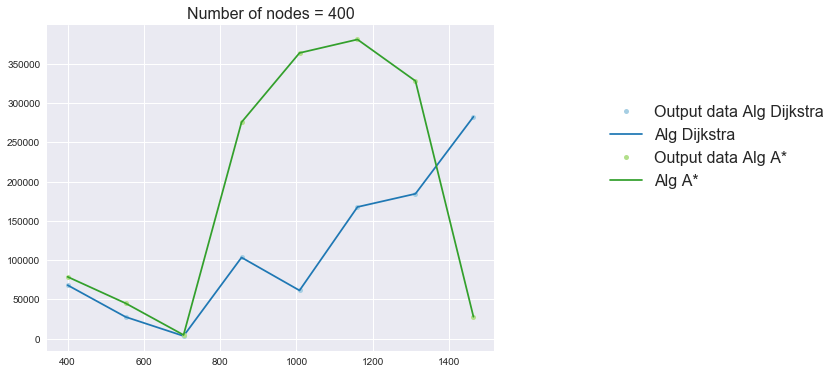

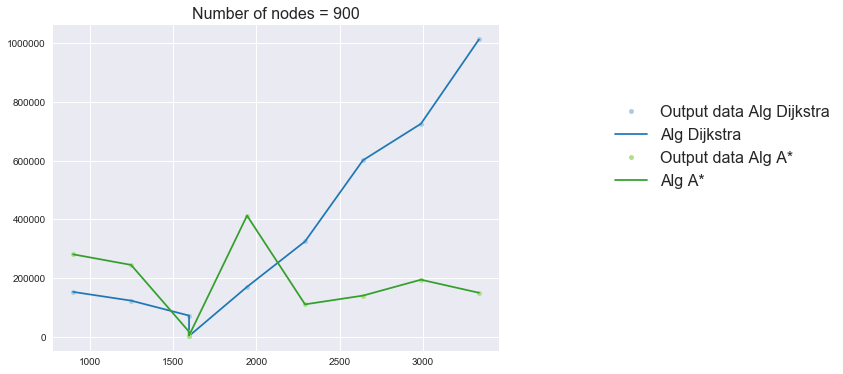

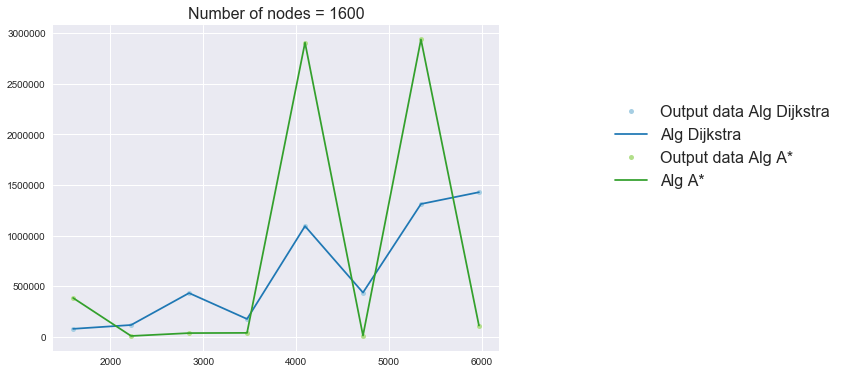

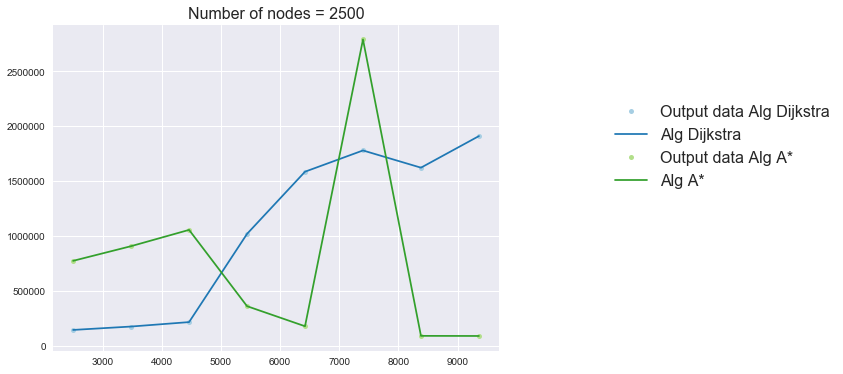

In [58]:
for i in range(50001):
    
    if len(dijkstra[0][i]) == 0:
        continue
            
    plt.figure(figsize=(8,6))
    
    x_min = 0
    x_max = i * 4
    y_min = 0
    y_max = max(dijkstra[1][i]) * 1.5
    
    plt.title("Number of nodes = " + str(i), fontsize=16)
        
    plt.plot(dijkstra[0][i], dijkstra[1][i], 'o', label = "Output data Alg Dijkstra", markersize = 5)
    plt.plot(dijkstra[0][i], dijkstra[1][i], label="Alg Dijkstra")
    
    plt.plot(astar[0][i], astar[1][i], 'o', label = "Output data Alg A*", markersize = 5)
    plt.plot(astar[0][i], astar[1][i], label="Alg A*")
    
    plt.legend(loc='upper center', bbox_to_anchor=(1.5, 0.8),  shadow=False, ncol=1, fontsize=16)

    plt.show()